Number of aggregation dimensions: 2
2024-02-08 08:41:04,431 INFO sqlalchemy.engine.Engine EXECUTE [dbo].[ReportCarePathActivtiy_By_actes] 1,'PARCOURS','',0,150,'COUNT',3,'Traitement',1,'Oncologie Medicale','V1'
2024-02-08 08:41:04,432 INFO sqlalchemy.engine.Engine [raw sql] ()
AlSQL_Requete - OK
2024-02-08 08:41:28,373 INFO sqlalchemy.engine.Engine EXECUTE [dbo].[ReportCarePathActivtiy_By_actes] 1,'PARCOURS','',0,150,'COUNT',3,'Traitement',1,'Radiothérapie','V1'
2024-02-08 08:41:28,374 INFO sqlalchemy.engine.Engine [raw sql] ()
AlSQL_Requete - OK
Experiment_id: 840488653129525693
Artifact Location: mlflow-artifacts:/840488653129525693
Tags: {'exp.version': '0.1'}
Lifecycle_stage: active
2024-02-08 08:41:53,789 INFO sqlalchemy.engine.Engine SELECT [NIP]
                        ,MIN([DD_A]) DPA_NIP
                        ,MAX([DF_A]) DDA_NIP
                        ,MIN(CASE WHEN T_ActesC.Phase='Traitement' THEN [DD_A] ELSE 99999 END) AS DPT_NIP
                        ,MAX(CASE WHEN T_

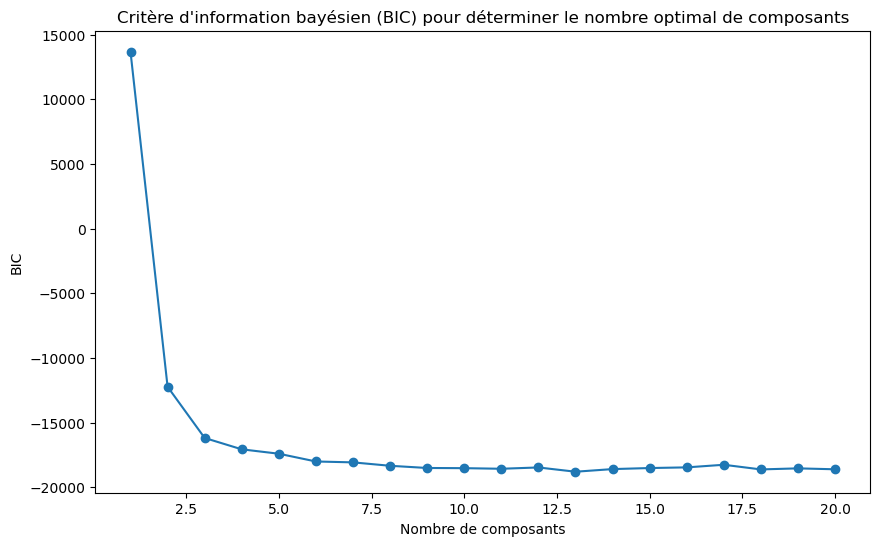

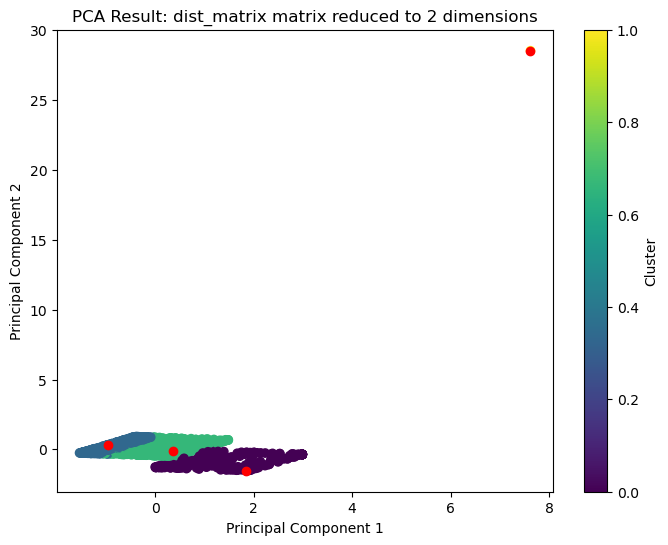

In [13]:
#test new clustering methods

import my_custom_func_Carepath_plotting as Mcfcp
import my_custom_func_Clustering as McfC
import my_custom_func_TS_Clust_1 as Mcftsc
import my_custom_func_config as Mcfconf
import mlflow 
import os
import pandas as pd

current_directory = os.getcwd()
file_path = os.path.join(current_directory, '00-Batch_configuration', 'export_config.csv')
config = pd.read_csv(file_path, encoding='ISO-8859-1')
Ac_config = config.iloc[0]

Create_dataset_parameters=Mcfconf.get_Create_dataset_parameters(Ac_config)
DSprefix=Ac_config['DS_Prefix']

Aggreg_parameters, Aggprefix=Mcfconf.get_Aggreg_param(Ac_config)
Aggreg_Patients=Mcftsc.get_Aggreg_Dataset3(Aggreg_parameters,Aggprefix)

Time_Clust_parameters=Mcfconf.set_Time_clust_parameters(Ac_config)
Time_Clust_parameters['Method']='GMM'
Time_Clust_parameters['Nb_clusters']=None


#MLFLOW SETUP
Experiment_name=Ac_config['Experiment']
Experiment_tag1=Ac_config['Experiment_tag_1']
Experiment_tag2=Ac_config['Experiment_tag_2']
Mcfconf.my_custom_func_MLFLOWconfig(Experiment_name,Experiment_tag1,Experiment_tag2)


My_List_NIP=Aggreg_Patients['df']['NIP']
DDT_Clust=McfC.prepare_clust_DDA_DDT(Create_dataset_parameters,DSprefix,My_List_NIP)
Time_Clust=DDT_Clust

Aggreg_Time_clust=McfC.cluster(Aggreg_Patients,Time_Clust,False,mlflow,Time_Clust_parameters )

In [10]:
Time_Clust_parameters['Method']='GMM'
Time_Clust_parameters['Nb_clusters']=4


In [8]:
Time_Clust_parameters

{'Method': 'GMM',
 'Nb_clusters': '4',
 'linkage': 'ward',
 'max_nb_clusters': 20,
 'threshold': 0.05,
 'clust_name': 'Cl_T',
 'curve_filename': 'C:/Users/vince/Documents/DSTI/DSTI_Projects/ML ICO Activity/06 - Temp_outputs/Cl_T_curve.png',
 'curve_mlflowname': 'Cl_T_curve',
 'PCA_filename': 'C:/Users/vince/Documents/DSTI/DSTI_Projects/ML ICO Activity/06 - Temp_outputs/Cl_T_PCA.png',
 'PCA_mlflowname': 'Cl_T_PCA',
 'Summary_filename': 'C:/Users/vince/Documents/DSTI/DSTI_Projects/ML ICO Activity/06 - Temp_outputs/Cl_T_Clust_Summary.csv',
 'Summary_mlflowname': 'Cl_T_Clust_Summary',
 'NIP_Carac_filename': 'C:/Users/vince/Documents/DSTI/DSTI_Projects/ML ICO Activity/06 - Temp_outputs/Cl_T_NIP_Carac.csv',
 'NIP_Carac_mlflowname': 'Cl_T_NIP_Carac',
 'Table_name': 'Mlflow_Exp_NIP_Cl_T1'}